In [12]:
%load_ext autoreload
%autoreload 2
from b2analysis import StackedHistogram
import numpy as np
import matplotlib.pyplot as plt

In [34]:
signal = np.random.normal(0,2,10000)
background = np.random.normal(1,5,100000)

In [35]:
stacked_hist = StackedHistogram(0, "x")
stacked_hist.create_histogram("background", background, 0, overflow_bin=True, range=(-8,8), bins=30)
stacked_hist.create_histogram("signal", signal, 0, overflow_bin=True, range=(-8,8), bins=30)

(<Figure size 540x450 with 1 Axes>,
 <AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=0\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>)

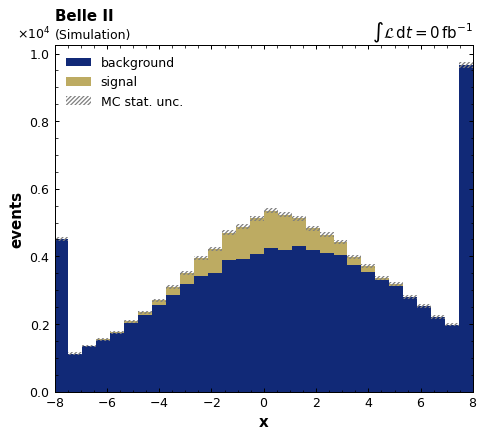

In [36]:
stacked_hist.plot()